Imports csv file from computer to notebook

In [ ]:
from google.colab import files
 
uploaded = files.upload()

Saving loan_application.csv to loan_application.csv


Imports packages and libraries

In [ ]:
import pandas as pd 
import io
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

df = pd.read_csv(io.BytesIO(uploaded['loan_application.csv'])) 

Splits Applicant Income, Co Applicant Income and Loan Amount into different 'bands', each band being equal in size

In [ ]:
df.loc[ df['ApplicantIncome'] <= 3166, 'ApplicantIncome'] = 1
df.loc[(df['ApplicantIncome'] > 3166) & (df['ApplicantIncome'] <= 4863), 'ApplicantIncome'] = 2
df.loc[(df['ApplicantIncome'] > 4863), 'ApplicantIncome'] = 3

In [ ]:
df.loc[ df['CoapplicantIncome'] <= 1188.5, 'CoapplicantIncome'] = 1
df.loc[df['CoapplicantIncome'] > 1188.5, 'CoapplicantIncome'] = 2

In [ ]:
df.loc[ df['LoanAmount'] <= 110, 'LoanAmount'] = 1
df.loc[(df['LoanAmount'] > 110) & (df['LoanAmount'] <= 151), 'LoanAmount'] = 2
df.loc[(df['LoanAmount'] > 151), 'LoanAmount'] = 3

Turns Categorical variables into integers. (Needed for sklearn/KNN)

In [ ]:
df['Gender'].replace({'Male': int(1), 'Female': int(0)}, inplace=True)
df['Married'].replace({'Yes': int(1), 'No': int(0)}, inplace=True)
df['Dependents'].replace({'3+': int(3), '2': int(2), '1': int(1), '0': int(0)}, inplace=True)
df['Self_Employed'].replace({'Yes': int(1), 'No': int(0)}, inplace=True)
df['Education'].replace( {'Graduate': int(1), 'Not Graduate': int(0)}, inplace=True)
df['Property_Area'].replace({'Semiurban': int(1), 'Urban': int(2), 'Rural': int(0)}, inplace=True)
df['Credit_History'].replace({1: 6}, inplace=True)

Replaces NaN values with the mode of that attribute

In [ ]:
d = {'Gender': 1, 'Married': 1, 'Dependents': 2, 'Education': 1, 'Self_Employed': 0, 'LoanAmount':2, 'Loan_Amount_Term': 360, 'Credit_History': 6, 'Property_Area': 1}

df.fillna(value=d, inplace=True)

Splits the dataset into X_train and Y_train for training the algorithm, and X_test to use the algorithm on and Y_test to compare accuracy with

In [ ]:
#df['Credit_History'].replace({1: 50}, inplace=True)


feature_cols  = ['Married', 'Education', 'CoapplicantIncome', 'Credit_History', 'Property_Area']
# ['Education', 'CoapplicantIncome', 'LoanAmount', 'Credit_History', 'Property_Area']
# ['Gender', 'Married', 'Education', 'Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History', 'Property_Area']
# ['Gender', 'Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area'] best I found so far

X = df[feature_cols] # Features
Y = df.Loan_Status # Target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test

Y_train

81     Y
133    Y
400    N
486    N
161    N
      ..
129    N
144    Y
72     Y
235    Y
37     Y
Name: Loan_Status, Length: 429, dtype: object

Tests to see if certain attributes still have missing values

In [ ]:
X_train['Property_Area'].isnull().values.any()

False

Tests KNN algoritm (imported from sklearn)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)

y_pred = classifier.predict(X_test)
print('Class Predition', list(y_pred)[:20])
print('Actual class label', list(Y_test)[:20])

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))



Class Predition ['Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y']
Actual class label ['N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y']
Accuracy: 0.772972972972973


Tests Decision Tree (imported from sklearn), also graphs decision tree.

Accuracy: 0.772972972972973


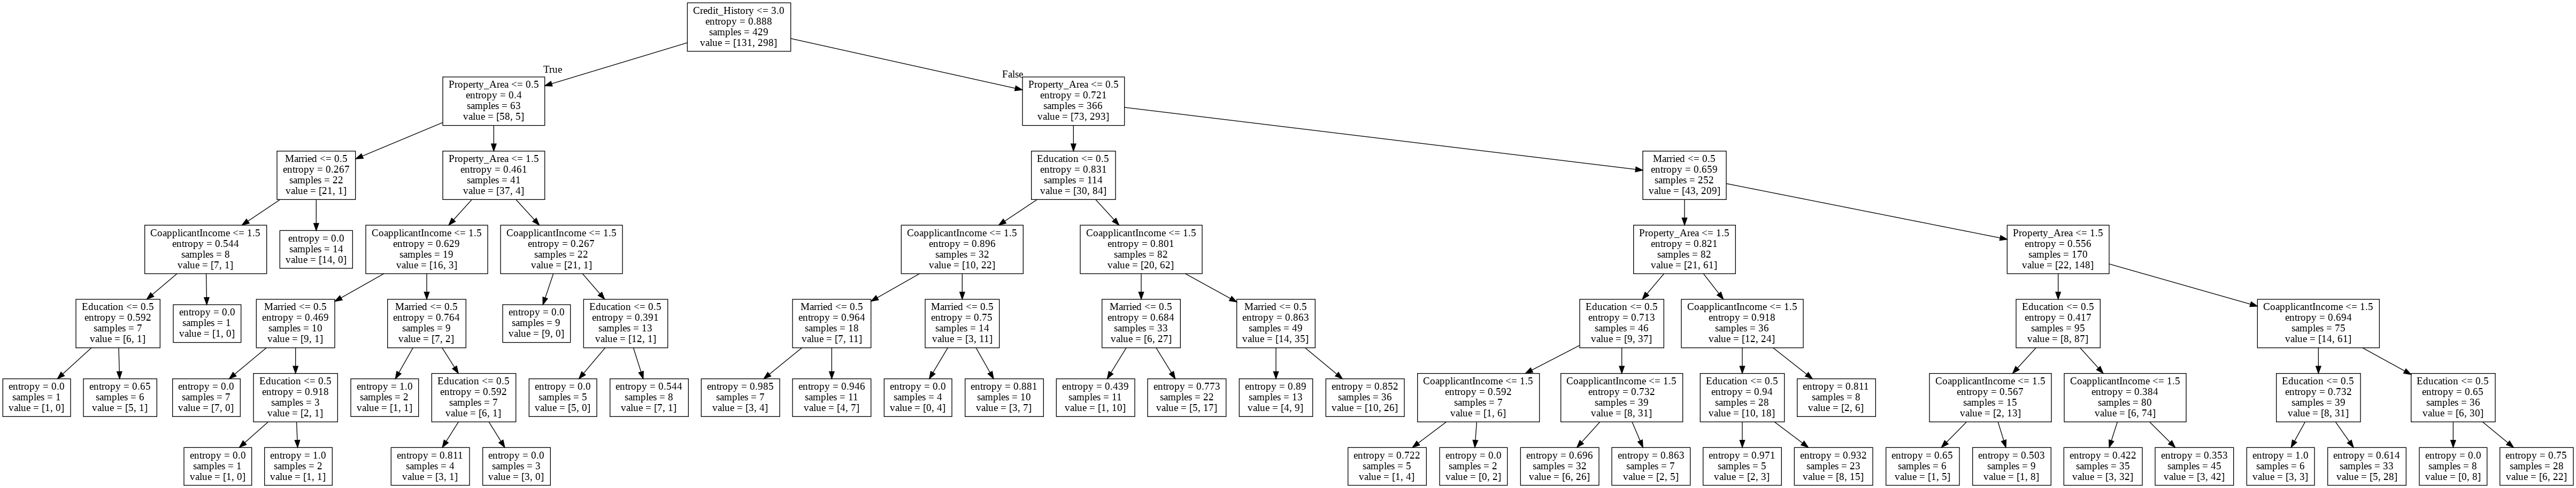

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_graphviz

import pydotplus

clf = DecisionTreeClassifier(criterion='entropy')

clf = clf.fit(X_train,Y_train)

y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_cols)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())